In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
import pandas as pd

In [3]:
[predictions_list, labels_all_deg_seed, labels_all_simba_seed, labels_all_simba_seed2] = \
    np.load('../temp/predictions_20seeds.npy', allow_pickle=True)

In [4]:
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

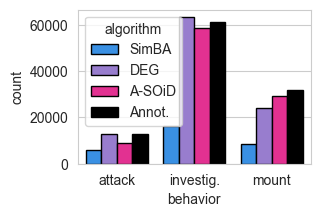

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
s = 1
data_dict = {'algorithm':
                 np.hstack([np.repeat(['Annot.'],
                                      len(targets_test[(targets_test<3)])),
                            np.repeat(['SimBA'],
                                      len(labels_all_simba_seed2[s][(targets_test<3) &
                                                                    (labels_all_simba_seed2[s]<3)])),
                            np.repeat(['DEG'],
                                      len(labels_all_deg_seed[s][(targets_test<3) &
                                                                 (labels_all_deg_seed[s]<3)])),
                            np.repeat(['A-SOiD'],
                                      len(predictions_list[-1][s][(targets_test<3) &
                                                                  (predictions_list[-1][s]<3)]))]),
             'behavior':
                 np.hstack([targets_test[(targets_test<3)],
                            labels_all_simba_seed2[s][(targets_test<3) &
                                                      (labels_all_simba_seed2[s]<3)],
                            labels_all_deg_seed[s][(targets_test<3) &
                                                   (labels_all_deg_seed[s]<3)],
                            predictions_list[-1][s][(targets_test<3) &
                                                    (predictions_list[-1][s]<3)]])}
df = pd.DataFrame(data=data_dict)
sns.countplot(data=df,
              x="behavior",
              hue="algorithm",
              hue_order=['SimBA', 'DEG', 'A-SOiD', 'Annot.'],
              edgecolor='k',
              palette=['dodgerblue', 'mediumpurple', 'deeppink', 'k'],
              ax=ax)
ax.set_xticklabels(['attack', 'investig.', 'mount'])
plt.show()

fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/predict_counts_bar.svg')

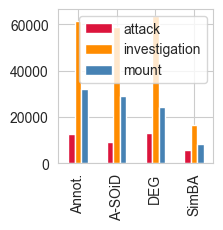

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
simba_predcounts, _ = np.histogram(df[df['algorithm']=='SimBA']['behavior'], bins=np.arange(0, 4))
deg_predcounts, _ = np.histogram(df[df['algorithm']=='DEG']['behavior'], bins=np.arange(0, 4))
asoid_predcounts, _ = np.histogram(df[df['algorithm']=='A-SOiD']['behavior'], bins=np.arange(0, 4))
annot_predcounts, _ = np.histogram(df[df['algorithm']=='Annot.']['behavior'], bins=np.arange(0, 4))
counts_df = pd.DataFrame({
    'Annot.': annot_predcounts,
    'A-SOiD': asoid_predcounts,
    'DEG': deg_predcounts,
    'SimBA': simba_predcounts,
},
    index=['attack', 'investigation', 'mount'])

counts_df.T.plot(kind='bar',
                 stacked=False,
                 color=['crimson', 'darkorange', 'steelblue'],
                 ax=ax)
plt.show()